In [1]:
import vmlab

In [2]:
from vmlab.models import vmango

### Create setup and derive a scene every month

In [3]:
setup = vmlab.create_setup(
    model=vmango,
    start_date='2003-06-01',
    end_date='2005-06-01',
    setup_toml='vmango.toml',
    current_cycle=3,
    input_vars={'geometry__interpretation_freq': 30},
    output_vars={'harvest__nb_fruit_harvested': 'day'}
)

### Run vmango in batch (parallel, multiprocessing) mode with a different 'seed' for each run 

In [4]:
ds_out = vmlab.run(
    setup,
    vmango,
    geometry={'size': 3.5, 'size_display': (600, 500)}, 
    batch=('seed', [{'topology__seed': seed} for seed in range(10, 14)])
)

SceneWidget(scenes=[{'id': 'WXxOf1vv5VmDSQeIq1c2uHEBB', 'data': b'x\xdaSLrw\xf5\xf7e`Pp\xe0\xe5RPVVd\x00\x020\…

             0%

### Plot results - the batch 'seed' is now available as an index with coordinates

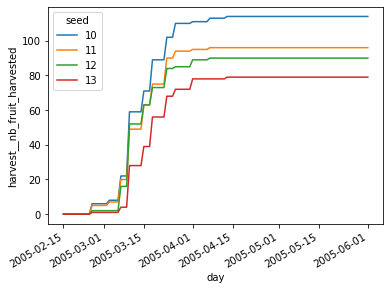

In [5]:
_ = ds_out.harvest__nb_fruit_harvested.sel({
        'day': slice('2005-02-15', '2005-06-01')
    }).sum(dim=['GU']).plot(hue='seed')